In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

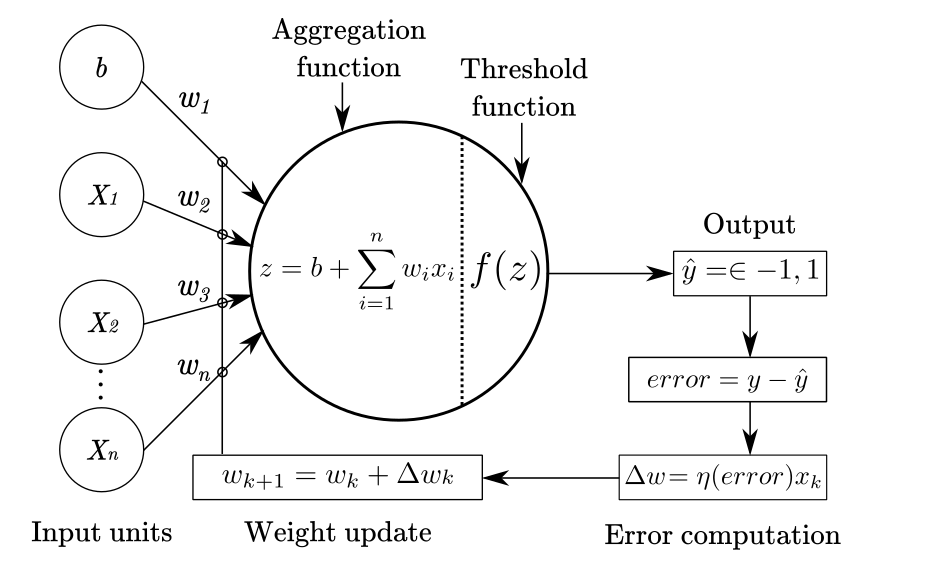

In [185]:

class Perceptron:
    
    def __init__(self, learning_rate=0.01, n_iters=1000) -> None:
        """
        Initialize the Perceptron model.

        :param learning_rate: The learning rate for the algorithm.
        :param n_iters: The number of iterations for training.
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.W = None  # Weight vector
        self.b = None  # Bias term
        
        # Print learning rate and number of iterations
        print({'Learning Rate': self.lr, 'Number of Iterations': self.n_iters})
        
        
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Calculate accuracy given true labels and predicted labels.

        :param y_true: True labels.
        :param y_pred: Predicted labels.
        :return: Accuracy.
        """
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    
    @staticmethod
    def activation_function(x):
        """
        Activation function (Step function) applied element-wise to input. if > 0 it is 1, else it is 0

        :param x: Input values.
        :return: Output values after activation.
        """
        return np.where(x > 0, 1, 0)
    
    
    def predict(self, X):
        """
        Make predictions using the trained model.

        :param X: Input data.
        :return: Predicted labels.
        """
        
        # Calculate the weighted sum of features and add the bias term
        out = np.dot(X, self.W) + self.b
        # Apply the activation function to the weighted sum
        y_predict = Perceptron.activation_function(out)
        return y_predict
    
    
    def fit(self, X, y):
        """
        Fit the Perceptron model to the given data.

        :param X: Input features.
        :param y: True labels.
        :return: List of accuracy values during training.
        """
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        y = np.where(y > 0, 1, 0)
        
        training_res = []  # To store accuracy values during training
        
        for _ in range(self.n_iters):
            pred_res = []  # List to store predicted labels for the current iteration
            
            # Loop through each data point and its index
            for idx, X_i in enumerate(X):
                
                # Calculate Weighted sum and apply activation,  $ŷ=g(f(x))=g(Wi.Xi+b)$
                y_predict = self.predict(X_i)
                
                # Calculate the change in weights based on the prediction error
                delta_W = self.lr * (y[idx] - y_predict)
                
                # Update the weights and bias using the calculated changes
                self.W += delta_W * X_i
                self.b += delta_W
                
                # Append the predicted label to the list
                pred_res.append(int(y_predict))
            
            # Calculate and store accuracy for the current iteration
            training_res.append(Perceptron.accuracy(y, pred_res))
        
        print(f" Training Result: {np.max(training_res)}")    
        return training_res

# Generate dataset a linearly seperaple dataset

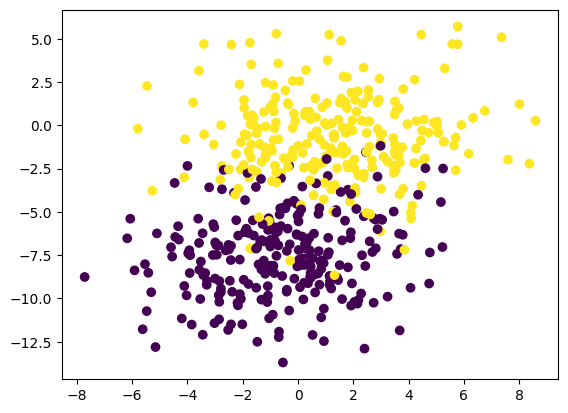

In [233]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=2.5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

In [249]:
p=Perceptron(learning_rate=0.01,n_iters=200)
Train_res=p.fit(X_train,y_train)
predictions = p.predict(X_test)
print("Test accuracy", Perceptron.accuracy(y_test, predictions))

{'Learning Rate': 0.01, 'Number of Iterations': 200}
 Training Result: 0.9171428571428571
Test accuracy 0.9


Prediciting First 5 elements in a test

In [250]:
predictions = p.predict(X_test[0:5,:])
predictions

array([0, 1, 1, 1, 0])

In [251]:
# The Final Weights and bias
print(p.W)
print(p.b)

[0.05683101 0.09384372]
0.3200000000000001


###  Plotting the Training  and Testing

 Training Result: 0.9


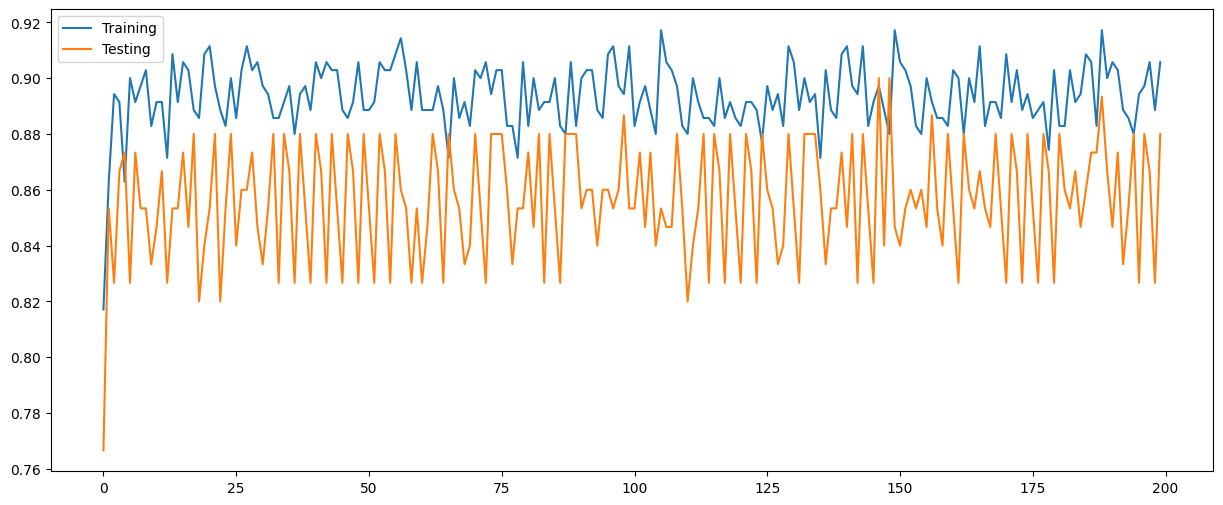

In [270]:
test_res=p.fit(X_test,y_test,)
plt.figure(figsize=(15,6))
plt.plot(Train_res,label="Training");
plt.plot(test_res,label="Testing");
plt.legend();


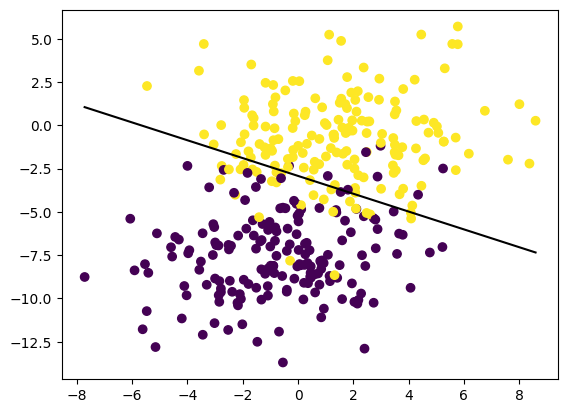

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.W[0] * x0_1 - p.b) / p.W[1]
x1_2 = (-p.W[0] * x0_2 - p.b) / p.W[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.show()

# Generate dataset not linearly seperaple

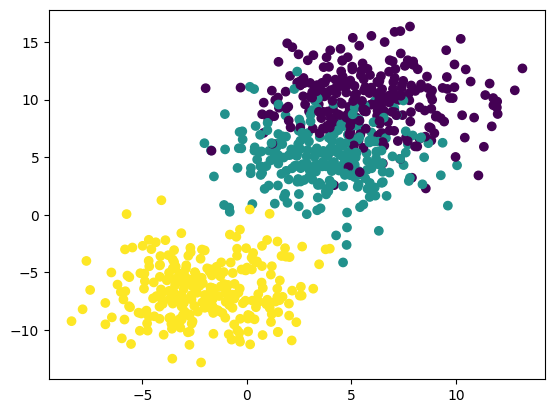

In [288]:
X, y = datasets.make_blobs(n_samples=800, n_features=2, centers=3, cluster_std=2.5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

In [289]:
p=Perceptron(learning_rate=0.01,n_iters=100)
res=p.fit(X_train,y_train)
predictions = p.predict(X_test)
print("Test accuracy", Perceptron.accuracy(y_test, predictions))

{'Learning Rate': 0.01, 'Number of Iterations': 100}
 Training Result: 0.8875
Test accuracy 0.559375


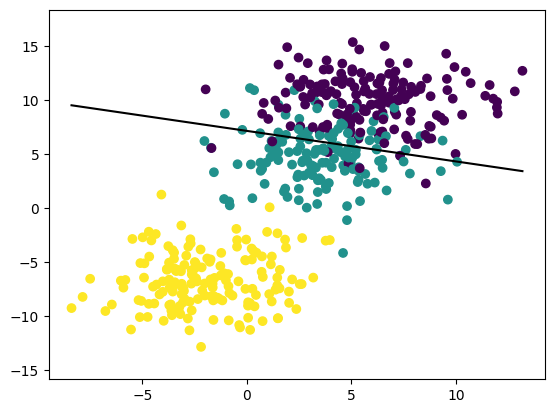

In [290]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.W[0] * x0_1 - p.b) / p.W[1]
x1_2 = (-p.W[0] * x0_2 - p.b) / p.W[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.show()

# Trying with Digits Dataset to detect number 7

In [752]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Digits dataset
digits = load_digits()

# Select the data and target for the digit "5"
X = digits.data
y = (digits.target == 7).astype(int)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

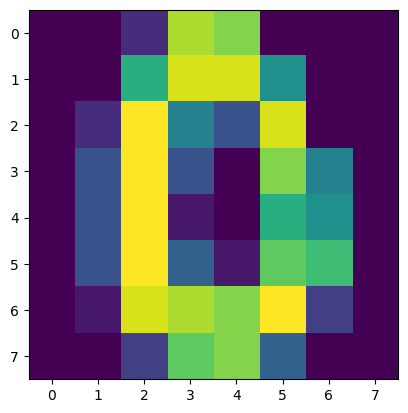

In [753]:
plt.imshow(X_train.reshape(1257, 8,8)[2]);

In [754]:
p=Perceptron(learning_rate=0.001,n_iters=10)
res=p.fit(X_train,y_train)
y_pred = p.predict(X_test)
print("Test accuracy", Perceptron.accuracy(y_test, predictions))

{'Learning Rate': 0.001, 'Number of Iterations': 10}
 Training Result: 0.9952267303102625
Test accuracy 0.8203703703703704


<Axes: >

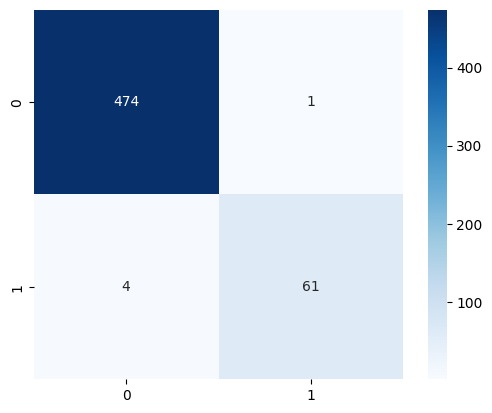

In [755]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

# Sklearn Implementation

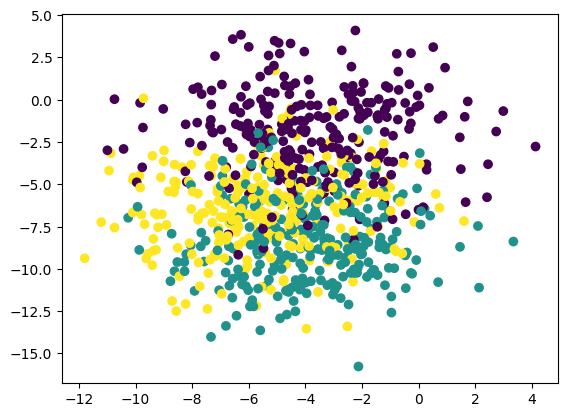

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

X, y = datasets.make_blobs(n_samples=800, n_features=2, centers=3, cluster_std=2.5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')

In [318]:
from sklearn.linear_model import Perceptron
p = Perceptron(penalty='elasticnet',fit_intercept=True,random_state=42)
p.fit(X_train, y_train)

Perceptron(penalty='elasticnet', random_state=42)

In [319]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(X_train)
predictions_test = p.predict(X_test)
train_score = accuracy_score(y_train,predictions_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_test,predictions_test)
print("score on test data: ", test_score)

score on train data:  0.48214285714285715
score on test data:  0.45416666666666666


The perceptron model doesn't work well on data that isn't linearly separable. Linear separability means that the data points from different classes can be separated by a straight line (in two dimensions), a hyperplane (in higher dimensions), or more generally, by a linear decision boundary. If the data is not linearly separable, the perceptron may struggle to find an appropriate decision boundary and fail to accurately classify the data points. Here are some scenarios where the perceptron may not work well:

1. **Non-Linear Data:**
   If the data points from different classes are not linearly separable and require a non-linear decision boundary to be accurately classified, the perceptron will likely fail to achieve high accuracy.

2. **Complex Relationships:**
   Data that has complex relationships and interactions between features often cannot be separated by a linear decision boundary. The perceptron's limitation in handling non-linear relationships can lead to poor performance.

3. **Overlapping Classes:**
   When the classes overlap significantly in feature space, it becomes challenging for a single-layer perceptron to find a suitable decision boundary that accurately separates the classes.

4. **Multi-Class Problems:**
   The perceptron is primarily designed for binary classification. Extending it to multi-class problems requires additional techniques like one-vs-rest or one-vs-one, which can become complex and may not perform well on intricate data.

5. **High-Dimensional Data:**
   In high-dimensional feature spaces, the data might not be linearly separable due to the "curse of dimensionality." High-dimensional spaces can lead to sparse data distributions that make linear separability less likely.

6. **Noise and Outliers:**
   The perceptron is sensitive to noise and outliers in the data. Even a few mislabeled or noisy data points can significantly affect its performance.

7. **Imbalanced Classes:**
   When classes are imbalanced (one class has significantly more samples than the other), the perceptron can be biased towards the majority class and struggle to classify the minority class accurately.

In [355]:

from sklearn.datasets import make_moons, make_circles, make_classification, load_iris, load_digits

# Function to plot decision boundary and data points
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    
    xlim = plt.xlim()
    ylim = plt.ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.Paired, alpha=0.3)
    plt.title(title)
    plt.show()


## Non-Linear Data

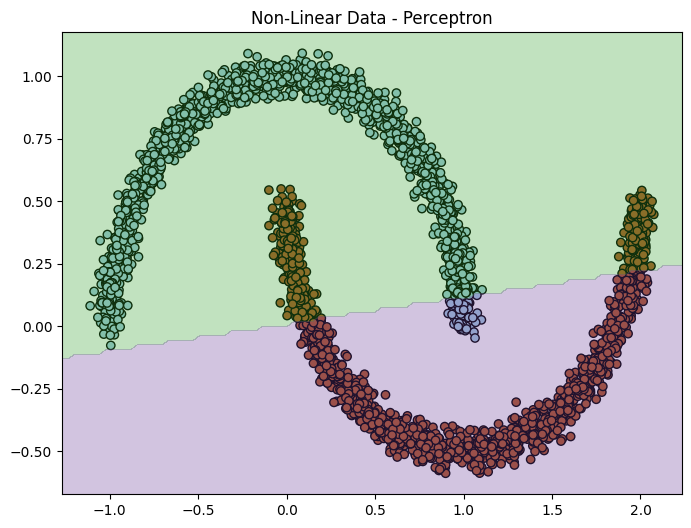

Non-Linear Data Accuracy: 0.8722222222222222


In [373]:
# Generate Non-Linear Data (Moons)
X_moons, y_moons = make_moons(n_samples=3000, noise=0.038, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, y_train)
print("Non-Linear Data Accuracy:", accuracy_score(y_test, perceptron.predict(X_test)))
plot_decision_boundary(X_moons, y_moons, perceptron, title= "Non-Linear Data - Perceptron")


## Complex Relationships

Complex Relationships Accuracy: 0.52


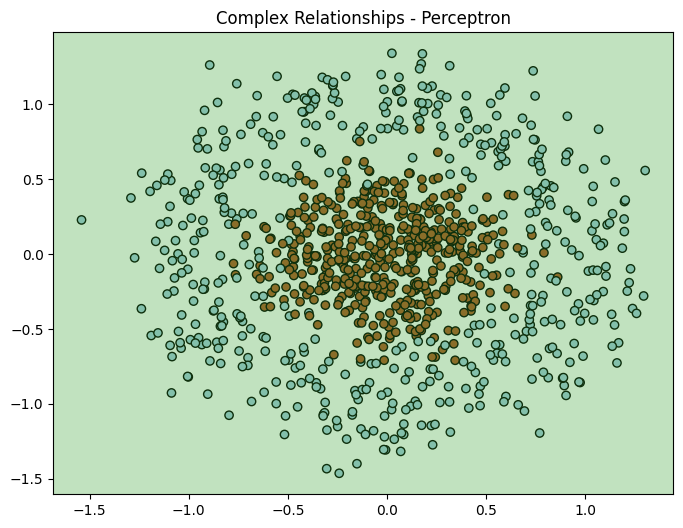

In [391]:
# Generate Complex Data (Circles)
X_circles, y_circles = make_circles(n_samples=1000, noise=0.2, factor=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)
perceptron.fit(X_train, y_train)
print("Complex Relationships Accuracy:", accuracy_score(y_test, perceptron.predict(X_test)))
plot_decision_boundary(X_circles, y_circles, perceptron, "Complex Relationships - Perceptron")

## Overlapping Classes

Overlapping Classes Accuracy: 0.7777777777777778


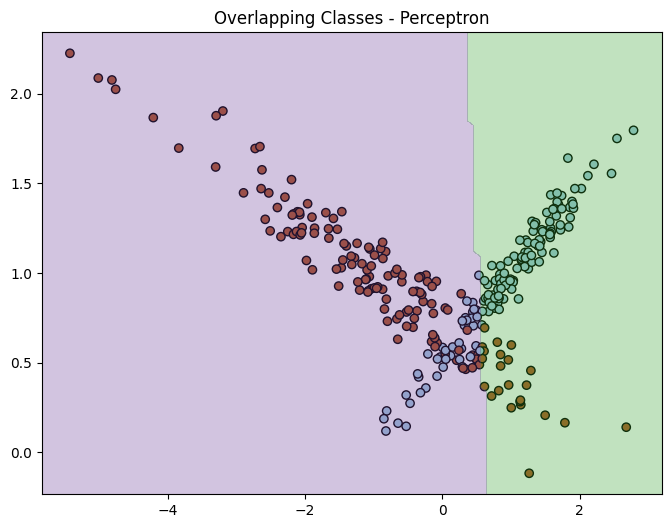

In [408]:
# Generate Overlapping Data
X_overlap, y_overlap = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                                           n_clusters_per_class=1, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_overlap, y_overlap, test_size=0.3, random_state=42)
perceptron.fit(X_train, y_train)
print("Overlapping Classes Accuracy:", accuracy_score(y_test, perceptron.predict(X_test)))
plot_decision_boundary(X_overlap, y_overlap, perceptron, "Overlapping Classes - Perceptron")


# Multiclasses 

Test accuracy: 0.6


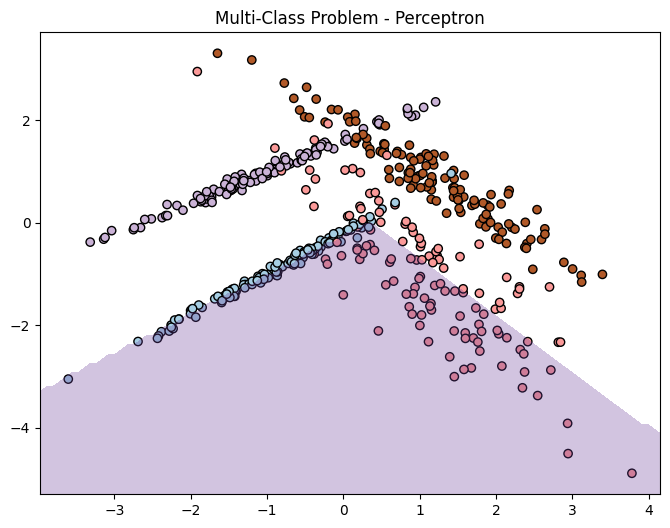

In [431]:

X_multiclass, y_multiclass = make_classification(n_samples=500, n_features=2, n_informative=2,
                                                 n_redundant=0, n_clusters_per_class=1,
                                                 n_classes=4, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=1)

# Initialize and train the Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_multiclass[:, 0], X_multiclass[:, 1], c=y_multiclass, cmap=plt.cm.Paired, edgecolors='k')

xlim = plt.xlim()
ylim = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.Paired, alpha=0.3)
plt.title("Multi-Class Problem - Perceptron")
plt.show()


Accuracy: 1.0


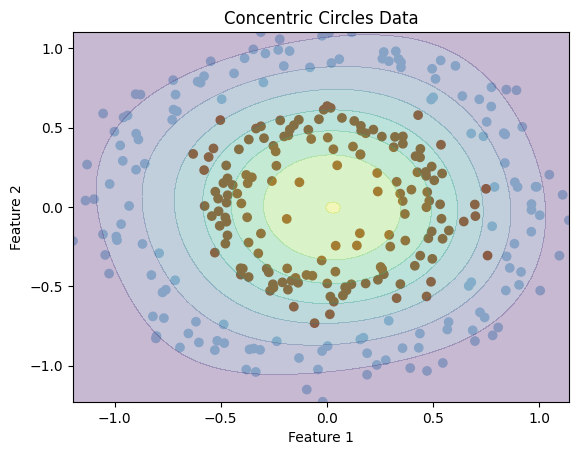

In [181]:
from sklearn.svm import SVC

# Generate data with concentric circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Concentric Circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the decision boundary of the SVM
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.show()


In [327]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Non-Linear Data
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Non-Linear Data Accuracy:", accuracy)

# Complex Relationships
X_complex = np.random.rand(300, 2)
y_complex = np.logical_xor(X_complex[:, 0] > 0.5, X_complex[:, 1] > 0.5)
perceptron.fit(X_complex, y_complex)
y_pred = perceptron.predict(X_complex)
accuracy = accuracy_score(y_complex, y_pred)
print("Complex Relationships Accuracy:", accuracy)

# Overlapping Classes
X_circles, y_circles = make_circles(n_samples=300, noise=0.15, factor=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Overlapping Classes Accuracy:", accuracy)

# Multi-Class Problems
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
perceptron.fit(X_iris, y_iris)
y_pred = perceptron.predict(X_iris)
accuracy = accuracy_score(y_iris, y_pred)
print("Multi-Class Problem Accuracy:", accuracy)

# High-Dimensional Data
X_high_dim = np.random.rand(300, 10)
y_high_dim = np.sum(X_high_dim, axis=1) > 5
perceptron.fit(X_high_dim, y_high_dim)
y_pred = perceptron.predict(X_high_dim)
accuracy = accuracy_score(y_high_dim, y_pred)
print("High-Dimensional Data Accuracy:", accuracy)

# Noise and Outliers
X_noisy = np.random.rand(300, 2)
y_noisy = np.logical_xor(X_noisy[:, 0] > 0.5, X_noisy[:, 1] > 0.5)
y_noisy[:10] = 1 - y_noisy[:10]  # Introduce mislabeling
perceptron.fit(X_noisy, y_noisy)
y_pred = perceptron.predict(X_noisy)
accuracy = accuracy_score(y_noisy, y_pred)
print("Noisy and Outliers Accuracy:", accuracy)

# Imbalanced Classes
X_imbalanced = np.random.rand(300, 2)
y_imbalanced = np.random.choice([0, 1], size=300, p=[0.9, 0.1])
perceptron.fit(X_imbalanced, y_imbalanced)
y_pred = perceptron.predict(X_imbalanced)
accuracy = accuracy_score(y_imbalanced, y_pred)
print("Imbalanced Classes Accuracy:", accuracy)


Non-Linear Data Accuracy: 0.85
Complex Relationships Accuracy: 0.5033333333333333
Overlapping Classes Accuracy: 0.43333333333333335
Multi-Class Problem Accuracy: 0.48
High-Dimensional Data Accuracy: 0.9733333333333334
Noisy and Outliers Accuracy: 0.5633333333333334
Imbalanced Classes Accuracy: 0.9


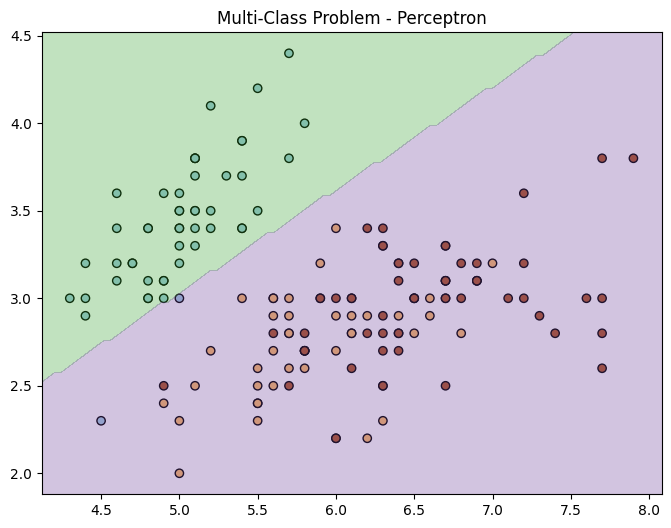

Multi-Class Problem Accuracy: 0.7111111111111111
High-Dimensional Data Accuracy: 0.43333333333333335


In [340]:
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris

# Function to plot decision boundary and data points
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    
    xlim = plt.xlim()
    ylim = plt.ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.Paired, alpha=0.3)
    plt.title(title)
    plt.show()

# Generate Multi-Class Problem using Perceptron
iris = load_iris()
X_iris = iris.data[:, :2]  # Taking only first two features for visualization
y_iris = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, y_train)
plot_decision_boundary(X_iris, y_iris, perceptron, "Multi-Class Problem - Perceptron")
print("Multi-Class Problem Accuracy:", accuracy_score(y_test, perceptron.predict(X_test)))

# Generate High-Dimensional Data
X_high_dim = np.random.rand(300, 10)
y_high_dim = np.random.randint(2, size=300)
X_train, X_test, y_train, y_test = train_test_split(X_high_dim, y_high_dim, test_size=0.2, random_state=42)
perceptron.fit(X_train, y_train)
print("High-Dimensional Data Accuracy:", accuracy_score(y_test, perceptron.predict(X_test)))


In [432]:
# Load the digits dataset
digits = load_digits()

# Split the data into features and labels
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Perceptron instance for each class
perceptrons = []
for class_label in np.unique(y_train):
    perceptron = Perceptron(max_iter=1000)
    # Convert class labels to binary labels for OvR
    y_binary = np.where(y_train == class_label, 1, 0)
    perceptron.fit(X_train, y_binary)
    perceptrons.append(perceptron)

# Predict using OvR approach
decision_scores = np.array([perceptron.decision_function(X_test) for perceptron in perceptrons])
y_pred = np.argmax(decision_scores, axis=0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9527777777777777
